In [1]:
import tensorflow as tf
import keras

Using TensorFlow backend.


In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 저장된 csv 파일을 읽어오기 위해 경로지정
os.chdir("C:/Users/user/AiProject")

# csv 파일 읽어오기
data_df = pd.read_csv('dust.csv', encoding = "CP949" ) #utf-8오류떠서 인코딩방식지정함

# 데이터 전처리를 위해 측정소명을 가지고 인덱스를 지정함 0~24

data_df['Observatory'] = data_df['Observatory'].map({'중구' : 0,'종로구' : 1,'용산구' : 2, '은평구' : 3,
'서대문구' : 4,'마포구' : 5,'광진구' : 6, '성동구' : 7,'중랑구' : 8,'동대문구' : 9,'성북구' : 10,
'도봉구' : 11,'강북구' : 12,'노원구' : 13,"강서구" : 14, '구로구' : 15,'영등포구' : 16,'동작구' : 17,
'관악구' : 18, '금천구' : 19, '양천구' : 20,'강남구' : 21, '서초구' : 22, '송파구' : 23, '강동구' : 24 })

data_df

,Date,Observatory,PM10,O3(ppm),NO2(ppm),CO(ppm),SO₂(ppm),PM2.5
0,20190101,0,26,18,0.023,0.012,0.4,0.002
1,20190101,1,27,19,0.021,0.015,0.4,0.003
2,20190101,2,14,15,0.020,0.015,0.4,0.003
3,20190101,3,24,13,0.024,0.010,0.4,0.003
4,20190101,4,23,9,0.023,0.013,0.5,0.002
...,...,...,...,...,...,...,...,...
8891,20191231,20,46,29,0.014,0.033,0.6,0.002
8892,20191231,21,37,31,0.012,0.028,0.6,0.005
8893,20191231,22,37,20,0.015,0.032,0.4,0.004
8894,20191231,23,44,28,0.011,0.042,0.8,0.004


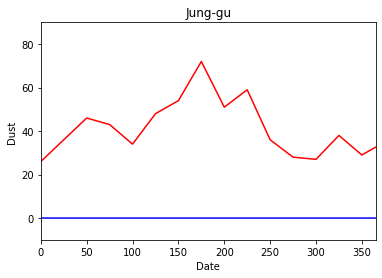

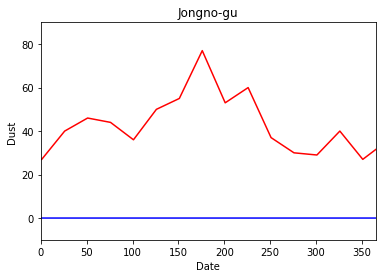

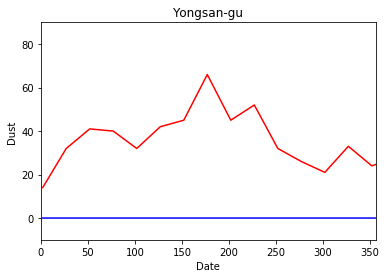

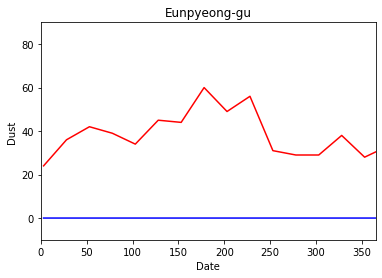

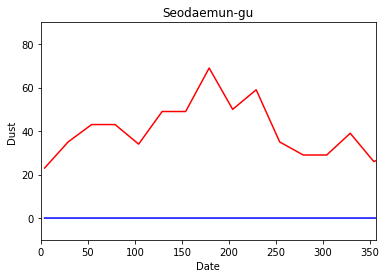

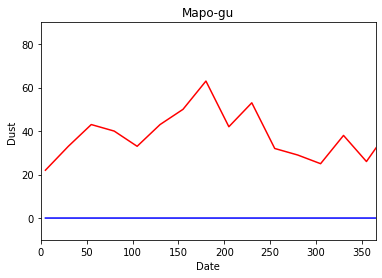

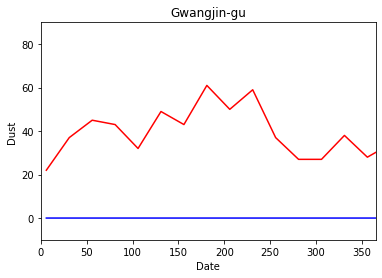

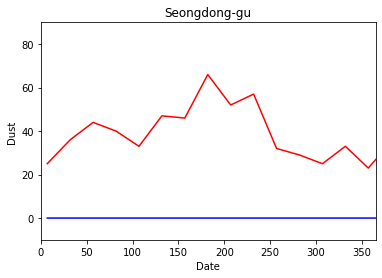

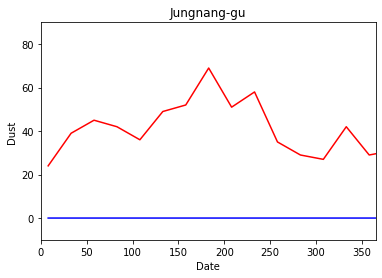

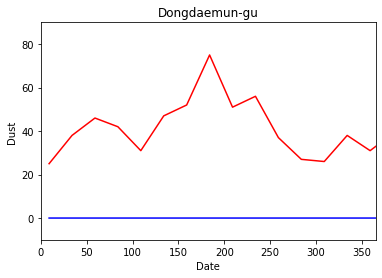

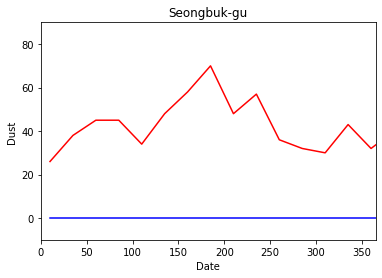

'\ndata11 = data_df[data_df[\'Observatory\'] == 11]\npm10 = data11.loc[:, [\'PM10\']]\npm2_5 = data11.loc[:, [\'PM2.5\']]\nplt.plot(pm10, color = \'r\')\nplt.plot(pm2_5, color = "b")\nplt.title(\'Dobong - gu\')\nplt.xlim([0, 365])\nplt.ylim([-10, 90])\nplt.xlabel("Date")\nplt.ylabel("Dust")\nplt.show()\n\ndata12 = data_df[data_df[\'Observatory\'] == 12]\npm10 = data12.loc[:, [\'PM10\']]\npm2_5 = data12.loc[:, [\'PM2.5\']]\nplt.plot(pm10, color = \'r\')\nplt.plot(pm2_5, color = "b")\nplt.title(\'Gangbuk - gu\')\nplt.xlim([0, 365])\nplt.ylim([-10, 90])\nplt.xlabel("Date")\nplt.ylabel("Dust")\nplt.show()\n\ndata13 = data_df[data_df[\'Observatory\'] == 13]\npm10 = data13.loc[:, [\'PM10\']]\npm2_5 = data13.loc[:, [\'PM2.5\']]\nplt.plot(pm10, color = \'r\')\nplt.plot(pm2_5, color = "b")\nplt.title(\'Nowon-gu\')\nplt.xlim([0, 365])\nplt.ylim([-10, 90])\nplt.xlabel("Date")\nplt.ylabel("Dust")\nplt.show()\n\ndata14 = data_df[data_df[\'Observatory\'] == 14]\npm10 = data14.loc[:, [\'PM10\']]\npm2

In [4]:
#2019년 일년간의 서울 각 구의 미세먼지(PM10M PM2.5) 분포도
data0 = data_df[data_df['Observatory'] == 0]
pm10 = data0.loc[:, ['PM10']]
pm2_5 = data0.loc[:, ['PM2.5']]
plt.plot(pm10, color = 'r')
plt.plot(pm2_5, color = "b")
plt.title('Jung-gu')
plt.xlim([0, 365])
plt.ylim([-10, 90])
plt.xlabel("Date")
plt.ylabel("Dust")
plt.show()

data1 = data_df[data_df['Observatory'] == 1]
pm10 = data1.loc[:, ['PM10']]
pm2_5 = data1.loc[:, ['PM2.5']]
plt.plot(pm10, color = 'r')
plt.plot(pm2_5, color = "b")
plt.title('Jongno-gu')
plt.xlim([0, 365])
plt.ylim([-10, 90])
plt.xlabel("Date")
plt.ylabel("Dust")
plt.show()

data2 = data_df[data_df['Observatory'] == 2]
pm10 = data2.loc[:, ['PM10']]
pm2_5 = data2.loc[:, ['PM2.5']]
plt.plot(pm10, color = 'r')
plt.plot(pm2_5, color = "b")
plt.title('Yongsan-gu')
plt.xlim([0, len(data2)])
plt.ylim([-10, 90])
plt.xlabel("Date")
plt.ylabel("Dust")
plt.show()

data3 = data_df[data_df['Observatory'] == 3]
pm10 = data3.loc[:, ['PM10']]
pm2_5 = data3.loc[:, ['PM2.5']]
plt.plot(pm10, color = 'r')
plt.plot(pm2_5, color = "b")
plt.title('Eunpyeong-gu')
plt.xlim([0, 365])
plt.ylim([-10, 90])
plt.xlabel("Date")
plt.ylabel("Dust")
plt.show()

data4 = data_df[data_df['Observatory'] == 4]
pm10 = data4.loc[:, ['PM10']]
pm2_5 = data4.loc[:, ['PM2.5']]
plt.plot(pm10, color = 'r')
plt.plot(pm2_5, color = "b")
plt.title('Seodaemun-gu')
plt.xlim([0, len(data4)])
plt.ylim([-10, 90])
plt.xlabel("Date")
plt.ylabel("Dust")
plt.show()

data5 = data_df[data_df['Observatory'] == 5]
pm10 = data5.loc[:, ['PM10']]
pm2_5 = data5.loc[:, ['PM2.5']]
plt.plot(pm10, color = 'r')
plt.plot(pm2_5, color = "b")
plt.title('Mapo-gu')
plt.xlim([0, 365])
plt.ylim([-10, 90])
plt.xlabel("Date")
plt.ylabel("Dust")
plt.show()

data6 = data_df[data_df['Observatory'] == 6]
pm10 = data6.loc[:, ['PM10']]
pm2_5 = data6.loc[:, ['PM2.5']]
plt.plot(pm10, color = 'r')
plt.plot(pm2_5, color = "b")
plt.title('Gwangjin-gu')
plt.xlim([0, 365])
plt.ylim([-10, 90])
plt.xlabel("Date")
plt.ylabel("Dust")
plt.show()

data7 = data_df[data_df['Observatory'] == 7]
pm10 = data7.loc[:, ['PM10']]
pm2_5 = data7.loc[:, ['PM2.5']]
plt.plot(pm10, color = 'r')
plt.plot(pm2_5, color = "b")
plt.title('Seongdong-gu')
plt.xlim([0, 365])
plt.ylim([-10, 90])
plt.xlabel("Date")
plt.ylabel("Dust")
plt.show()

data8 = data_df[data_df['Observatory'] == 8]
pm10 = data8.loc[:, ['PM10']]
pm2_5 = data8.loc[:, ['PM2.5']]
plt.plot(pm10, color = 'r')
plt.plot(pm2_5, color = "b")
plt.title('Jungnang-gu')
plt.xlim([0, 365])
plt.ylim([-10, 90])
plt.xlabel("Date")
plt.ylabel("Dust")
plt.show()

data9 = data_df[data_df['Observatory'] == 9]
pm10 = data9.loc[:, ['PM10']]
pm2_5 = data9.loc[:, ['PM2.5']]
plt.plot(pm10, color = 'r')
plt.plot(pm2_5, color = "b")
plt.title('Dongdaemun-gu')
plt.xlim([0, 365])
plt.ylim([-10, 90])
plt.xlabel("Date")
plt.ylabel("Dust")
plt.show()

data10 = data_df[data_df['Observatory'] == 10]
pm10 = data10.loc[:, ['PM10']]
pm2_5 = data10.loc[:, ['PM2.5']]
plt.plot(pm10, color = 'r')
plt.plot(pm2_5, color = "b")
plt.title('Seongbuk-gu')
plt.xlim([0, 365])
plt.ylim([-10, 90])
plt.xlabel("Date")
plt.ylabel("Dust")
plt.show()

'''
data11 = data_df[data_df['Observatory'] == 11]
pm10 = data11.loc[:, ['PM10']]
pm2_5 = data11.loc[:, ['PM2.5']]
plt.plot(pm10, color = 'r')
plt.plot(pm2_5, color = "b")
plt.title('Dobong - gu')
plt.xlim([0, 365])
plt.ylim([-10, 90])
plt.xlabel("Date")
plt.ylabel("Dust")
plt.show()

data12 = data_df[data_df['Observatory'] == 12]
pm10 = data12.loc[:, ['PM10']]
pm2_5 = data12.loc[:, ['PM2.5']]
plt.plot(pm10, color = 'r')
plt.plot(pm2_5, color = "b")
plt.title('Gangbuk - gu')
plt.xlim([0, 365])
plt.ylim([-10, 90])
plt.xlabel("Date")
plt.ylabel("Dust")
plt.show()

data13 = data_df[data_df['Observatory'] == 13]
pm10 = data13.loc[:, ['PM10']]
pm2_5 = data13.loc[:, ['PM2.5']]
plt.plot(pm10, color = 'r')
plt.plot(pm2_5, color = "b")
plt.title('Nowon-gu')
plt.xlim([0, 365])
plt.ylim([-10, 90])
plt.xlabel("Date")
plt.ylabel("Dust")
plt.show()

data14 = data_df[data_df['Observatory'] == 14]
pm10 = data14.loc[:, ['PM10']]
pm2_5 = data14.loc[:, ['PM2.5']]
plt.plot(pm10, color = 'r')
plt.plot(pm2_5, color = "b")
plt.title('Gangseo-gu')
plt.xlim([0, len(data14)])
plt.ylim([-10, 90])
plt.xlabel("Date")
plt.ylabel("Dust")
plt.show()

data15 = data_df[data_df['Observatory'] == 15]
pm10 = data15.loc[:, ['PM10']]
pm2_5 = data15.loc[:, ['PM2.5']]
plt.plot(pm10, color = 'r')
plt.plot(pm2_5, color = "b")
plt.title('Guro-gu')
plt.xlim([0, 365])
plt.ylim([-10, 90])
plt.xlabel("Date")
plt.ylabel("Dust")
plt.show()

data16 = data_df[data_df['Observatory'] == 16]
pm10 = data16.loc[:, ['PM10']]
pm2_5 = data16.loc[:, ['PM2.5']]
plt.plot(pm10, color = 'r')
plt.plot(pm2_5, color = "b")
plt.title('Yeongdeungpo - gu')
plt.xlim([0, 365])
plt.ylim([-10, 90])
plt.xlabel("Date")
plt.ylabel("Dust")
plt.show()

data17 = data_df[data_df['Observatory'] == 17]
pm10 = data17.loc[:, ['PM10']]
pm2_5 = data17.loc[:, ['PM2.5']]
plt.plot(pm10, color = 'r')
plt.plot(pm2_5, color = "b")
plt.title('Dongjak-gu')
plt.xlim([0, 365])
plt.ylim([-10, 90])
plt.xlabel("Date")
plt.ylabel("Dust")
plt.show()

data18 = data_df[data_df['Observatory'] == 18]
pm10 = data18.loc[:, ['PM10']]
pm2_5 = data18.loc[:, ['PM2.5']]
plt.plot(pm10, color = 'r')
plt.plot(pm2_5, color = "b")
plt.title('Gwanak-gu')
plt.xlim([0, 365])
plt.ylim([-10, 90])
plt.xlabel("Date")
plt.ylabel("Dust")
plt.show()

data19 = data_df[data_df['Observatory'] == 19]
pm10 = data19.loc[:, ['PM10']]
pm2_5 = data19.loc[:, ['PM2.5']]
plt.plot(pm10, color = 'r')
plt.plot(pm2_5, color = "b")
plt.title('Geumcheon - gu')
plt.xlim([0, 365])
plt.ylim([-10, 90])
plt.xlabel("Date")
plt.ylabel("Dust")
plt.show()

data20 = data_df[data_df['Observatory'] == 20]
pm10 = data20.loc[:, ['PM10']]
pm2_5 = data20.loc[:, ['PM2.5']]
plt.plot(pm10, color = 'r')
plt.plot(pm2_5, color = "b")
plt.title('Yangcheon-gu')
plt.xlim([0, 365])
plt.ylim([-10, 90])
plt.xlabel("Date")
plt.ylabel("Dust")
plt.show()

data21 = data_df[data_df['Observatory'] == 21]
pm10 = data21.loc[:, ['PM10']]
pm2_5 = data21.loc[:, ['PM2.5']]
plt.plot(pm10, color = 'r')
plt.plot(pm2_5, color = "b")
plt.title('Gangnam-gu')
plt.xlim([0, 365])
plt.ylim([-10, 90])
plt.xlabel("Date")
plt.ylabel("Dust")
plt.show()

data22 = data_df[data_df['Observatory'] == 22]
pm10 = data22.loc[:, ['PM10']]
pm2_5 = data22.loc[:, ['PM2.5']]
plt.plot(pm10, color = 'r')
plt.plot(pm2_5, color = "b")
plt.title('Seocho-gu')
plt.xlim([0, 365])
plt.ylim([-10, 90])
plt.xlabel("Date")
plt.ylabel("Dust")
plt.show()

data23 = data_df[data_df['Observatory'] == 23]
pm10 = data23.loc[:, ['PM10']]
pm2_5 = data23.loc[:, ['PM2.5']]
plt.plot(pm10, color = 'r')
plt.plot(pm2_5, color = "b")
plt.title('Songpa-gu')
plt.xlim([0, 365])
plt.ylim([-10, 90])
plt.xlabel("Date")
plt.ylabel("Dust")
plt.show()



data24 = data_df[data_df['Observatory'] == 24]
pm10 = data24.loc[:, ['PM10']]
pm2_5 = data24.loc[:, ['PM2.5']]
plt.plot(pm10, color = 'r')
plt.plot(pm2_5, color = "b")
plt.title('Gangdong-gu')
plt.xlim([0, 365])
plt.ylim([-10, 90])
plt.xlabel("Date")
plt.ylabel("Dust")
plt.show()

'''

In [5]:
# 강남구데이터를 Train_set으로 지정하여 데이터 전처리하기 
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 저장된 csv 파일을 읽어오기 위해 경로지정
os.chdir("C:/Users/user/AiProject")

# csv 파일 읽어오기
df = pd.read_csv('Gangnam-gu.csv', encoding = "CP949" ) #utf-8오류떠서 인코딩방식지정함
df['PM10'] = df['PM10'].fillna(data_df['PM10'].mean()).astype(float) # PM10 부분에 공백이 있어서 공백 데이터를 해당 열의 평균으로 대체
df

,Date,Observatory,PM10,PM2.5,O3(ppm),NO2(ppm),CO(ppm),SO₂(ppm)
0,2010-01-01,강남구,36.0,NaN,0.007,0.037,0.6,0.006
1,2010-01-02,강남구,56.0,NaN,0.008,0.037,0.6,0.008
2,2010-01-03,강남구,50.0,NaN,0.012,0.041,0.7,0.007
3,2010-01-04,강남구,38.0,NaN,0.009,0.042,0.6,0.005
4,2010-01-05,강남구,50.0,NaN,0.017,0.032,0.5,0.006
...,...,...,...,...,...,...,...,...
3631,2019-12-27,강남구,31.0,23.0,0.019,0.028,0.5,0.003
3632,2019-12-28,강남구,42.0,27.0,0.004,0.044,0.6,0.003
3633,2019-12-29,강남구,43.0,29.0,0.005,0.041,0.7,0.003
3634,2019-12-30,강남구,35.0,25.0,0.012,0.032,0.6,0.003


In [6]:
from numpy import array
pm10_data = array(df["PM10"])
print(len(pm10_data))
pm25_data = array(df["PM2.5"])

3636


In [7]:
feature = 1 # 다음달 미세먼지를 예측하기
steps = 30 # 지난 한달치 데이터를 기반으로 하여 

In [8]:
# 데이터 전처리 
from numpy import array # name 'array' is not defined 오류가 출력됨

def split(mise_data, steps):
    X, y = list(), list()
    
    for i in range(len(mise_data)):
        end = i + steps
        
        if end > len(mise_data)-1:
            break
            
        spl_x, spl_y = mise_data[i:end], mise_data[end]
        X.append(spl_x)
        y.append(spl_y)
        
    return array(X), array(y)
   #  return X, y
       

In [9]:
x_pm10, y_pm10 = split(pm10_data, steps)
x_pm25, y_pm25 = split(pm25_data, steps)

print(x_pm10.shape)
print(y_pm10.shape)
x_pm10 # 데이터를 30개씩 묶어서 배열로 생성함, x_pm10 배열에는 마지막 한달 값이 저장되지 않음
# y_pm10 # y_pm10 배열에는 처음 한달 값이 저장되지 않음

(3606, 30)
(3606,)


array([[ 36.,  56.,  50., ...,  57.,  49.,  86.],
       [ 56.,  50.,  38., ...,  49.,  86., 105.],
       [ 50.,  38.,  50., ...,  86., 105., 112.],
       ...,
       [ 54.,  52.,  48., ...,  45.,  31.,  42.],
       [ 52.,  48.,  26., ...,  31.,  42.,  43.],
       [ 48.,  26.,  33., ...,  42.,  43.,  35.]])

In [10]:
# 신경망의 빠른학습을 위한 정규화
def MinMaxScalar(data):
    mise1 = data - np.min(data, 0)
    mise2 = np.max(data, 0) - np.min(data, 0)
    return mise1 / mise2

a = MinMaxScalar(x_pm10)
b = MinMaxScalar(y_pm10)
c = MinMaxScalar(x_pm25)
d = MinMaxScalar(y_pm25)
# print(a)

In [11]:
X_pm10 = a.reshape((x_pm10.shape[0], x_pm10.shape[1], 1))
X_pm25 = a.reshape((x_pm25.shape[0], x_pm25.shape[1], 1))
X_pm10.shape
# RNN에 입력할 훈련셋 생성완료

(3606, 30, 1)

In [12]:
# 심층 RNN 구현 LSTM 알고리즘 사용

model = Sequential()
model.add(LSTM(20, activation = 'relu', input_shape = (steps,feature) )) 

# model.add(LSTM(32, activation = 'relu'))
model.add(Dense(1))

model.compile(optimizer = 'adam', loss = 'mse', metrics = ['accuracy'])

hist = model.fit(X_pm10, b, epochs=50, batch_size = 10 , verbose = 1)
model.summary

Epoch 1/50
361/361 [==============================] - 2s 4ms/step - loss: 0.0022 - accuracy: 5.5463e-04
Epoch 2/50
361/361 [==============================] - 2s 5ms/step - loss: 0.0019 - accuracy: 5.5463e-04
Epoch 3/50
361/361 [==============================] - 2s 4ms/step - loss: 0.0018 - accuracy: 5.5463e-04
Epoch 4/50
361/361 [==============================] - 2s 5ms/step - loss: 0.0018 - accuracy: 5.5463e-04
Epoch 5/50
361/361 [==============================] - 2s 5ms/step - loss: 0.0017 - accuracy: 5.5463e-04
Epoch 6/50
361/361 [==============================] - 2s 5ms/step - loss: 0.0017 - accuracy: 5.5463e-04
Epoch 7/50
361/361 [==============================] - 2s 5ms/step - loss: 0.0017 - accuracy: 5.5463e-04
Epoch 8/50
361/361 [==============================] - 2s 5ms/step - loss: 0.0016 - accuracy: 5.5463e-04
Epoch 9/50
361/361 [==============================] - 2s 4ms/step - loss: 0.0016 - accuracy: 5.5463e-04
Epoch 10/50
361/361 [==============================] - 2s 5ms/st

<bound method Network.summary of <tensorflow.python.keras.engine.sequential.Sequential object at 0x00000142F6535348>>

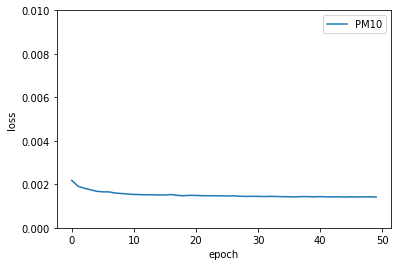

In [13]:
plt.plot(hist.history['loss'])
plt.ylim(0.0, 0.01)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['PM10'], loc = 'upper right')
plt.show()

In [14]:
TEST = pd.read_csv('test.csv', encoding = 'CP949') # 테스트셋
test_pm10 = array(TEST['PM10'])
x_test, y_test = split(test_pm10, steps)
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))

y_pred = model.predict(x_test) # 테스트모델을 가지고 예측해보기

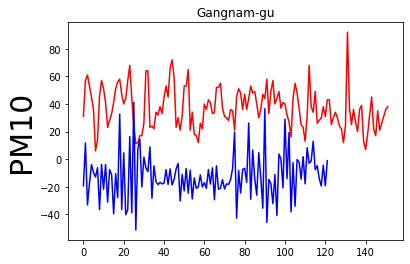

In [15]:
plt.plot(test_pm10, 'r')
plt.plot(y_pred, 'b')
plt.title("Gangnam-gu")
plt.ylabel('PM10', fontsize = 30)
plt.show()
plt.show()